In [2]:
import pandas as pd

In [46]:
import json
import re

# JSON 파일 경로
file_path = '03_3941.json'

# 1. JSON 파일 읽기
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)  # JSON 데이터를 Python 딕셔너리로 변환

# 2. 'C'나 'E'로 시작하는 캐릭터를 필터링 및 정렬
characters = data.get('characters', [])

# 'C'나 'E'로 시작하는 캐릭터를 추출해 숫자 기준으로 정렬
ce_characters = sorted([char for char in characters if char.startswith(('C', 'E'))],
                       key=lambda x: (x[0], int(re.findall(r'\d+', x)[0])))
print(ce_characters)

# 3. 'C'나 'E'로 시작하지 않는 캐릭터를 찾아 빈 자리에 적절히 삽입
for i, char in enumerate(characters):
    if not char.startswith('C') and not char.startswith('E'):  # 'C'나 'E'로 시작하지 않는 캐릭터
        # 적절한 위치 찾기
        for j in range(len(ce_characters) - 1):
            c_before = int(re.findall(r'\d+', ce_characters[j])[0])
            print(c_before)   # 앞의 C/E 캐릭터 숫자
            c_after = int(re.findall(r'\d+', ce_characters[j+1])[0])  # 뒤의 C/E 캐릭터 숫자
            print(c_after)
            char_type = ce_characters[j][0]  # C 또는 E를 구분

            # 숫자 사이에 있는지 확인
            if c_before < c_after - 1:  # 중간에 빈 숫자가 있으면
                new_char = f"{char_type}{c_before + 1:03d}"  # C004, E006 형식으로 새 캐릭터 생성
                print(new_char)
                characters[i] = new_char  # 캐릭터 치환
                ce_characters.insert(j+1, new_char)  # ce_characters 리스트에 새로 추가
                break

# 4. units에서 해당 캐릭터도 치환
units = data.get('units', [])
for unit in units:
    if 'character' in unit and unit['character'] == char:  # 기존에 치환된 캐릭터가 있는지 확인
        unit['character'] = new_char  # 새 캐릭터로 치환

# 5. 수정된 데이터를 JSON 파일로 저장
#with open(file_path, 'w', encoding='utf-8') as file:
#    json.dump(data, file, ensure_ascii=False, indent=4)
#
#print(f"{char}가 {new_char}로 치환되었습니다.")


['C001', 'C002', 'C003', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010']
1
2
2
3
3
5
C004


In [36]:
a= data.get('units')
a=pd.DataFrame(a);a

,id,next_id,characters,stage,storyline,unit_motif,causality,story_scripts,prev_id
0,03_3941_01,03_3941_02,"[C002, C003]",Opening Salvo,C002가 C003을 고문해서 마나 저장소의 위치와 교단에 대해 알아낸다.,정보 획득,Achievement(성취/보상),"[{'type': 'narrative', 'location': '감옥', 'char...",NaN
1,03_3941_02,03_3941_03,"[C002, C001]",Setting-up,C002가 책2라는 교단의 책을 C001에게 보고한다.,상황 설명,Reconnaissance(정탐),"[{'type': 'narrative', 'location': '도시3 집무실', ...",03_3941_01
2,03_3941_03,03_3941_04,"[C001, C002]",Setting-up,C001이 C002에게 교단2라는 교단에 대한 정보를 얻고 전생의 기억에서 교단2라...,상황 파악,Reconnaissance(정탐),"[{'type': 'script', 'location': '도시3 집무실', 'ch...",03_3941_02
3,03_3941_04,03_3941_05,"[C001, C002]",Setting-up,C002가 상단1 상단의 위치를 C001에게 알려주고 C001이 교단을 처리하러 떠난다.,여정의 시작,First Action(시작),"[{'type': 'narrative', 'location': '도시3 집무실', ...",03_3941_03
4,03_3941_05,03_3941_06,"[C001, C005, 사병들]",1st Accident,C001이 C005에게 상단1 상단까지 가는 안내를 맡긴다.,여정,Seeker(추적/추구),"[{'type': 'narrative', 'location': '마을2', 'cha...",03_3941_04
5,03_3941_06,03_3941_07,"[C001, 상단 직원, C005, 용병들, 용병1, 용병2]",1st Accident,C001이 상단주를 찾다가 교단2가 책을 나눠주는 곳이 자작가의 영지에도 있다는 걸...,정보 획득,Seeker(추적/추구),"[{'type': 'narrative', 'location': '상단1 건물', '...",03_3941_05
6,03_3941_07,03_3941_08,"[C001, 상단주, 용병들]",1st Accident,C001이 상단주를 찾아 제압해서 인쇄소까지 안내하도록 만든다.,적 제압/퇴치,Seeker(추적/추구),"[{'type': 'narrative', 'location': '상단주 집무실', ...",03_3941_06
7,03_3941_08,03_3941_09,"[상단주, C001, C005]",Making a Choice,C001이 C005을 용서하고 상단주와 인쇄소가 있는 산1 산으로 출발한다.,추적/수색,Seeker(추적/추구),"[{'type': 'narrative', 'location': '상단1 건물', '...",03_3941_07
8,03_3941_09,03_3941_10,"[C001, 상단주]",Making a Choice,C001이 상단주의 안내로 인쇄소를 찾고 상단주에게 인쇄소와 관련된 정보를 얻는다.,전투 준비,Reconnaissance(정탐),"[{'type': 'narrative', 'location': '산1', 'char...",03_3941_08
9,03_3941_10,03_3941_11,"[C001, 용병2, E001]",2nd Accident,C001이 교단이 영지인들에게 범죄를 저지르고도 처벌받지 않는다는 말을 듣고 화가 난다.,상황 파악,Enemy(적/적대자),"[{'type': 'narrative', 'location': '동굴', 'char...",03_3941_09


In [47]:
a['characters']

,characters
0,"[C002, C003]"
1,"[C002, C001]"
2,"[C001, C002]"
3,"[C001, C002]"
4,"[C001, C005, 사병들]"
5,"[C001, 상단 직원, C005, 용병들, 용병1, 용병2]"
6,"[C001, 상단주, 용병들]"
7,"[상단주, C001, C005]"
8,"[C001, 상단주]"
9,"[C001, 용병2, E001]"


In [8]:
df = pd.read_csv('all_chars_story.csv')
df

,Unnamed: 0,id,characters,genre,motif,unit_motif,unit_stage,scene_char,scene_type,scene_emotion,scene_content
0,0,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],narrative,단호하다,C002이 발표한다.
1,1,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,C001은 역모를 꾸미지 않았다. 그러니 C001은 더 이상 감옥에 갇혀있지 않을 ...
2,2,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],narrative,초조하다,중신1이 소리친다.
3,3,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],script,초조하다,말도 안 됩니다! C001은 전하를 헤치려고 한 자입니다.
4,4,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,증거가 있는가?
...,...,...,...,...,...,...,...,...,...,...,...
879658,879658,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,화나다,미쳤어?
879659,879659,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],narrative,단호하다,C001이 C002에게 오늘 이후로 만나지 않을 거라고 말한다.
879660,879660,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C002'],narrative,씁쓸하다,C002이 C001에게 이제 너 없이도 잘 잔다고 말한다.
879661,879661,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,괘씸하다,잘 됐다.


In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True);df

,id,characters,genre,motif,unit_motif,unit_stage,scene_char,scene_type,scene_emotion,scene_content
0,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],narrative,단호하다,C002이 발표한다.
1,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,C001은 역모를 꾸미지 않았다. 그러니 C001은 더 이상 감옥에 갇혀있지 않을 ...
2,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],narrative,초조하다,중신1이 소리친다.
3,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],script,초조하다,말도 안 됩니다! C001은 전하를 헤치려고 한 자입니다.
4,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,증거가 있는가?
...,...,...,...,...,...,...,...,...,...,...
879658,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,화나다,미쳤어?
879659,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],narrative,단호하다,C001이 C002에게 오늘 이후로 만나지 않을 거라고 말한다.
879660,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C002'],narrative,씁쓸하다,C002이 C001에게 이제 너 없이도 잘 잔다고 말한다.
879661,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,괘씸하다,잘 됐다.


In [5]:
df = df.iloc[0:1000,];df

,id,characters,genre,motif,unit_motif,unit_stage,scene_char,scene_type,scene_emotion,scene_content
0,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],narrative,단호하다,C002이 발표한다.
1,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,C001은 역모를 꾸미지 않았다. 그러니 C001은 더 이상 감옥에 갇혀있지 않을 ...
2,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],narrative,초조하다,중신1이 소리친다.
3,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],script,초조하다,말도 안 됩니다! C001은 전하를 헤치려고 한 자입니다.
4,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,증거가 있는가?
...,...,...,...,...,...,...,...,...,...,...
995,02_3203,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['미스터리', '드라마']",수사의뢰,조사/정찰,Making a Choice,['C002'],script,짜증나다,사무실에 올라가는 김에 해수 샘플을 갖고 와.
996,02_3203,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['미스터리', '드라마']",수사의뢰,조사/정찰,2nd Accident,['C001'],narrative,긴장되다,C001가 사무실 안에 들어온다.
997,02_3203,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['미스터리', '드라마']",수사의뢰,조사/정찰,2nd Accident,['C005'],script,난감하다,"C010 씨의 검사 결과가 올라왔는데, C002 씨가 뭐 하는지 알아?"
998,02_3203,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['미스터리', '드라마']",수사의뢰,조사/정찰,2nd Accident,['C001'],script,긴장되다,저는 먼저 퇴근할게요.


In [13]:
import ast

# 문자열을 리스트로 변환 (파싱)
df['characters_parsed'] = df['characters'].apply(ast.literal_eval)

# characters 열을 성분별로 하나씩 나누기
df_exploded = df.explode('characters_parsed')

# 결과 출력
print(df_exploded[['id', 'characters_parsed']])

             id characters_parsed
0       02_2987              C001
0       02_2987              C002
0       02_2987              C003
0       02_2987              C004
0       02_2987              C005
...         ...               ...
879662  01_0656              C020
879662  01_0656              C021
879662  01_0656              C022
879662  01_0656              C023
879662  01_0656              C024

[12727713 rows x 2 columns]


In [72]:
# 'C'와 'E'로 시작하는 캐릭터의 번호를 확인하고, 빠진 번호를 채우며 scene_content도 업데이트하는 함수 정의
def replace_characters_and_update_scene(characters, scene_content):
    # 'C'와 'E'로 시작하는 캐릭터 추출 및 정렬
    def extract_number(char):
        # 정규표현식으로 숫자를 추출하고, 없으면 아주 큰 값 반환
        numbers = re.findall(r'\d+', char)
        return int(numbers[0]) if numbers else 0  # 숫자가 없으면 inf로 반환

    c_characters = sorted([char for char in characters if char.startswith('C')],
                          key=lambda x: extract_number(x))
    e_characters = sorted([char for char in characters if char.startswith('E')],
                          key=lambda x: extract_number(x))

    # 최대 번호 구하기 (빈 리스트일 경우 기본값 0 설정)
    max_c_number = max([extract_number(char) for char in c_characters], default=0)
    max_e_number = max([extract_number(char) for char in e_characters], default=0)

    # C나 E로 시작하지 않는 캐릭터를 처리할 리스트
    updated_characters = []
    next_c_number = 1
    next_e_number = 1
    char_mapping = {}  # 원래 캐릭터명 -> 바꾼 캐릭터명 맵핑
    missing_numbers = False  # 빠진 번호가 있는지 확인하는 플래그

    # C와 E로 시작하는 캐릭터들의 번호가 연속적인지 확인
    for idx in range(1, max_c_number):
        if f"C{idx:03d}" not in c_characters:
            missing_numbers = True
            break

    for idx in range(1, max_e_number):
        if f"E{idx:03d}" not in e_characters:
            missing_numbers = True
            break

    # 만약 빠진 번호가 없다면 한글 등장인물 그대로 유지
    if not missing_numbers:
        return characters, scene_content

    # 빠진 번호가 있으면 한글 등장인물을 C나 E로 대체
    for char in characters:
        if not char.startswith('C') and not char.startswith('E'):
            # C나 E로 시작하지 않는 경우 적절한 번호로 대체
            if next_c_number <= max_c_number:  # C 캐릭터 추가
                new_char = f"C{next_c_number:03d}"
                next_c_number += 1
            elif next_e_number <= max_e_number:  # E 캐릭터 추가
                new_char = f"E{next_e_number:03d}"
                next_e_number += 1
            char_mapping[char] = new_char  # 한글 등장인물 -> Cxxx나 Exxx로 매핑
            updated_characters.append(new_char)
        else:
            # C나 E로 시작하는 캐릭터는 번호를 유지하고 추가
            updated_characters.append(char)
            if char.startswith('C'):
                next_c_number = extract_number(char) + 1
            elif char.startswith('E'):
                next_e_number = extract_number(char) + 1

    # scene_content에서 등장인물 이름 변경
    for original_char, new_char in char_mapping.items():
        scene_content = re.sub(original_char, new_char, scene_content)

    #return updated_characters, scene_content

    # 디버깅을 위해 출력
    print(f"Updated characters: {updated_characters}")
    print(f"Updated scene_content: {scene_content}")

    return updated_characters, scene_content


# 1. 각 소설 ID별로 그룹화하여 처리
grouped = df.groupby('id')

# 2. 각 그룹에 대해 동일한 characters를 사용하여 scene_content 업데이트
for name, group in grouped:
    characters = group['characters'].iloc[0]  # 동일한 characters 가져옴
    df.loc[df['id'] == name, ['updated_characters', 'updated_scene_content']] = group.apply(
        lambda row: replace_characters_and_update_scene(characters, row['scene_content']), axis=1, result_type='expand'
    )

# 결과 출력
df

error: unterminated character set at position 0

In [64]:
df

,id,characters,genre,motif,unit_motif,unit_stage,scene_char,scene_type,scene_emotion,scene_content,updated_characters,updated_scene_content,characters_no_brackets
0,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],narrative,단호하다,C002이 발표한다.,NaN,NaN,"'C001', 'C002', 'C003', 'C004', 'C005', 'C006'..."
1,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,C001은 역모를 꾸미지 않았다. 그러니 C001은 더 이상 감옥에 갇혀있지 않을 ...,NaN,NaN,"'C001', 'C002', 'C003', 'C004', 'C005', 'C006'..."
2,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],narrative,초조하다,중신1이 소리친다.,NaN,NaN,"'C001', 'C002', 'C003', 'C004', 'C005', 'C006'..."
3,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],script,초조하다,말도 안 됩니다! C001은 전하를 헤치려고 한 자입니다.,NaN,NaN,"'C001', 'C002', 'C003', 'C004', 'C005', 'C006'..."
4,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,증거가 있는가?,NaN,NaN,"'C001', 'C002', 'C003', 'C004', 'C005', 'C006'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879658,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,화나다,미쳤어?,NaN,NaN,"'C001', 'C002', 'C003', 'C004', 'C005', 'C006'..."
879659,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],narrative,단호하다,C001이 C002에게 오늘 이후로 만나지 않을 거라고 말한다.,NaN,NaN,"'C001', 'C002', 'C003', 'C004', 'C005', 'C006'..."
879660,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C002'],narrative,씁쓸하다,C002이 C001에게 이제 너 없이도 잘 잔다고 말한다.,NaN,NaN,"'C001', 'C002', 'C003', 'C004', 'C005', 'C006'..."
879661,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,괘씸하다,잘 됐다.,NaN,NaN,"'C001', 'C002', 'C003', 'C004', 'C005', 'C006'..."


In [61]:
df['characters_no_brackets'].unique()

array(["'C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010', 'C011', 'C012'",
       "'C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010', 'C011', 'C012', 'C013'",
       "'C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010', 'C011', 'C012', 'C013', 'C014', 'C015', 'C016'",
       "'C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010', 'C011', 'C012', 'C013', 'C014', 'C015', 'C016', 'C017', 'C018', 'C019', 'C020'",
       "'C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010', 'C011', 'C012', 'C013', 'C014', 'C015'",
       "'C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010', 'C011', 'C012', 'C013', 'C014', 'C015', 'C016', 'C017', 'C018'",
       "'C001', 'C002', 'C003', 'C004', 'C005'",
       "'C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010'",
       "'C001', 'C002', 'C003', 'C004', 'C005', 'C006', 

In [14]:
df_1 = pd.read_csv('character_df.csv')
df_1

,Characters_ENG,Characters_KR
0,"['C006', ' C003', ' C007', ' C005', ' C010', '...","['시골관리인', ' 사숙', ' 조직들', ' 중신', ' 사숙']"
1,"['C006', ' C007', ' C010', ' C002', ' C008', '...","[' 역무원', ' 꽃집사장님', ' 영사관직원', ' 김비서', ' 투숙객들']"
2,"['C006', ' C015', ' C003', ' C007', ' E001', '...","[' 가게손님', ' 회사직원', ' 보육원아이들']"
3,"['C003', ' C013', ' C005', ' C020', ' C018', '...","[' 조직들', ' 살수', ' 조직']"
4,"['C006', ' C003', ' C007', ' E003', ' C005', '...","[' 경찰', ' 낚시꾼', ' 연구원']"
...,...,...
3110,"['C006', ' C003', ' C005', ' C004', ' C002', '...","[' 꼬마', ' 사회자', ' 최형사', ' 소방관', ' 편집장', ' 사내',..."
3111,"['C006', ' C003', ' C013', ' C005', ' C012', '...","[' 하객', ' 조연출', ' 코디', ' C의처', ' 감독', ' 사람들', ..."
3112,"['C006', ' C003', ' C013', ' C005', ' C012', '...","['사내들', ' 세신사', ' 허약녀', ' 아가씨', ' 간호사', ' 젊은남자..."
3113,"['C003', ' C005', ' E007', ' E006', ' E004', '...","['E부', ' 백인병사', ' 무전병', ' 보초병', ' 진욱', ' 인민장교'..."


In [19]:
for i in range(len(df_1)):
  df_1['characters_sort'] = df_1['Characters_ENG'].apply(ast.literal_eval)

df_1

,Characters_ENG,Characters_KR,unique_characters,characters_sort
0,"['C006', ' C003', ' C007', ' C005', ' C010', '...","['시골관리인', ' 사숙', ' 조직들', ' 중신', ' 사숙']","[ , ', ,, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, C, E, ...","[C006, C003, C007, C005, C010, C002, C00..."
1,"['C006', ' C007', ' C010', ' C002', ' C008', '...","[' 역무원', ' 꽃집사장님', ' 영사관직원', ' 김비서', ' 투숙객들']","[ , ', ,, 0, 1, 2, 4, 5, 6, 7, 8, C, [, ]]","[C006, C007, C010, C002, C008, C005, C00..."
2,"['C006', ' C015', ' C003', ' C007', ' E001', '...","[' 가게손님', ' 회사직원', ' 보육원아이들']","[ , ', ,, 0, 1, 2, 3, 4, 5, 6, 7, 9, C, E, [, ]]","[C006, C015, C003, C007, E001, C016, C00..."
3,"['C003', ' C013', ' C005', ' C020', ' C018', '...","[' 조직들', ' 살수', ' 조직']","[ , ', ,, 0, 1, 2, 3, 4, 5, 7, 8, 9, C, E, [, ]]","[C003, C013, C005, C020, C018, C009, C01..."
4,"['C006', ' C003', ' C007', ' E003', ' C005', '...","[' 경찰', ' 낚시꾼', ' 연구원']","[ , ', ,, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, C, E, ...","[C006, C003, C007, E003, C005, C013, C00..."
...,...,...,...,...
3110,"['C006', ' C003', ' C005', ' C004', ' C002', '...","[' 꼬마', ' 사회자', ' 최형사', ' 소방관', ' 편집장', ' 사내',...","[ , ', ,, 0, 1, 2, 3, 4, 5, 6, C, [, ]]","[C006, C003, C005, C004, C002, C001]"
3111,"['C006', ' C003', ' C013', ' C005', ' C012', '...","[' 하객', ' 조연출', ' 코디', ' C의처', ' 감독', ' 사람들', ...","[ , ', ,, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, C, E, ...","[C006, C003, C013, C005, C012, C018, C00..."
3112,"['C006', ' C003', ' C013', ' C005', ' C012', '...","['사내들', ' 세신사', ' 허약녀', ' 아가씨', ' 간호사', ' 젊은남자...","[ , ', ,, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, C, E, ...","[C006, C003, C013, C005, C012, E006, C00..."
3113,"['C003', ' C005', ' E007', ' E006', ' E004', '...","['E부', ' 백인병사', ' 무전병', ' 보초병', ' 진욱', ' 인민장교'...","[ , ', ,, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, C, E, ...","[C003, C005, E007, E006, E004, E002, E00..."


In [21]:
# 2. 모든 리스트를 하나로 모으기
all_characters = df_1['characters_sort'].explode().tolist()

# 3. 고유한 값만 추출 (set 사용)
unique_characters = sorted(set(all_characters))


In [22]:
unique_characters

['',
 ' 1',
 ' 2',
 ' 3',
 ' 4',
 ' 6',
 ' 7',
 ' 8',
 ' AD',
 ' C001',
 ' C001C007',
 ' C002',
 ' C003',
 ' C004',
 ' C005',
 ' C0051',
 ' C0052',
 ' C005C006',
 ' C005C007',
 ' C005C011',
 ' C006',
 ' C007',
 ' C008',
 ' C008C012',
 ' C009',
 ' C0091',
 ' C0092',
 ' C010',
 ' C011',
 ' C0111',
 ' C0112',
 ' C011C016',
 ' C012',
 ' C0121',
 ' C0122',
 ' C013',
 ' C0131',
 ' C014',
 ' C015',
 ' C016',
 ' C017',
 ' C0171',
 ' C018',
 ' C0181',
 ' C019',
 ' C020',
 ' C021',
 ' C022',
 ' C023',
 ' C024',
 ' C025',
 ' C026',
 ' C027',
 ' C028',
 ' C029',
 ' C030',
 ' C031',
 ' C032',
 ' C033',
 ' C034',
 ' C035',
 ' C036',
 ' C037',
 ' C038',
 ' C039',
 ' C040',
 ' C041',
 ' C042',
 ' C043',
 ' C044',
 ' C045',
 ' C046',
 ' C047',
 ' C049',
 ' C050',
 ' C051',
 ' C052',
 ' C053',
 ' C054',
 ' C055',
 ' C056',
 ' C057',
 ' C058',
 ' C059',
 ' C060',
 ' C061',
 ' C062',
 ' C063',
 ' C064',
 ' C065',
 ' C066',
 ' CP',
 ' DJ',
 ' DJ1',
 ' E001',
 ' E0011',
 ' E0012',
 ' E002',
 ' E003',
 ' E00

In [46]:
a = ['C005 C007']

In [30]:
df.drop('characters_str',axis=1,inplace=True);df

,id,characters,genre,motif,unit_motif,unit_stage,scene_char,scene_type,scene_emotion,scene_content,characters_parsed
0,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],narrative,단호하다,C002이 발표한다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."
1,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,C001은 역모를 꾸미지 않았다. 그러니 C001은 더 이상 감옥에 갇혀있지 않을 ...,"[C001, C002, C003, C004, C005, C006, C007, C00..."
2,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],narrative,초조하다,중신1이 소리친다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."
3,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],script,초조하다,말도 안 됩니다! C001은 전하를 헤치려고 한 자입니다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."
4,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,증거가 있는가?,"[C001, C002, C003, C004, C005, C006, C007, C00..."
...,...,...,...,...,...,...,...,...,...,...,...
879658,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,화나다,미쳤어?,"[C001, C002, C003, C004, C005, C006, C007, C00..."
879659,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],narrative,단호하다,C001이 C002에게 오늘 이후로 만나지 않을 거라고 말한다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."
879660,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C002'],narrative,씁쓸하다,C002이 C001에게 이제 너 없이도 잘 잔다고 말한다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."
879661,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,괘씸하다,잘 됐다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."


In [45]:
df.loc[0,'characters_parsed'][0]

'C001'

In [44]:
# 2. 모든 리스트를 하나로 모으기
all_characters = df['characters_parsed'].explode().tolist()

# 3. 고유한 값만 추출 (set 사용)
unique_characters = sorted(set(all_characters))

unique_characters

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'C001',
 'C002',
 'C003',
 'C004',
 'C005',
 'C005 C007',
 'C006',
 'C007',
 'C008',
 'C009',
 'C010',
 'C011',
 'C012',
 'C013',
 'C014',
 'C015',
 'C016',
 'C017',
 'C018',
 'C019',
 'C020',
 'C021',
 'C022',
 'C023',
 'C024',
 'C025',
 'C026',
 'C027',
 'C028',
 'C029',
 'C030',
 'C031',
 'C032',
 'C033',
 'C034',
 'C035',
 'C036',
 'C037',
 'C038',
 'C039',
 'C040',
 'C041',
 'C042',
 'C043',
 'C044',
 'C045',
 'C046',
 'C047',
 'C048',
 'C049',
 'C050',
 'C051',
 'C052',
 'C053',
 'C054',
 'C055',
 'C056',
 'C057',
 'C058',
 'C059',
 'C060',
 'C061',
 'C062',
 'C063',
 'C064',
 'C065',
 'C066',
 'E001',
 'E002',
 'E003',
 'E004',
 'E005',
 'E007',
 'E009',
 'E011',
 'E025',
 'M',
 '간호사 언니',
 '감찰관',
 '강 형사',
 '강조교',
 '걸',
 '걸그룹 1',
 '고모',
 '곰',
 '관장',
 '괴물',
 '괴수',
 '교감',
 '교도관1',
 '귀족 가문 연합2',
 '그',
 '그룹1',
 '그룹2',
 '기자들',
 '김여인',
 '남자',
 '남편',
 '냇',
 '녹',
 '논',
 '능력1',
 '능력2',
 '능력3',
 '닉',
 '닐',
 '단체3',
 '단체6',
 '댄',
 '뎁',
 '도사',


In [34]:
# 각 원소를 문자열로 변환하는 함수
df['characters_parsed'] = df['characters_parsed'].apply(lambda x: [str(i) for i in x])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879663 entries, 0 to 879662
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 879663 non-null  object
 1   characters         879663 non-null  object
 2   genre              879663 non-null  object
 3   motif              879663 non-null  object
 4   unit_motif         879663 non-null  object
 5   unit_stage         879663 non-null  object
 6   scene_char         877406 non-null  object
 7   scene_type         879663 non-null  object
 8   scene_emotion      879663 non-null  object
 9   scene_content      879663 non-null  object
 10  characters_parsed  879663 non-null  object
dtypes: object(11)
memory usage: 73.8+ MB


In [47]:
# 삭제할 행의 인덱스 추적
rows_to_delete = []

# 1. 각 행을 반복해서 확인
for i in range(len(df)):
    for j in df.loc[i, 'characters_parsed']:
        if j in a:
            # 만약 하나라도 a에 있으면 그 행을 삭제 후보로 설정
            rows_to_delete.append(i)
            break  # 해당 행에서 더 이상 검사할 필요가 없으므로 중단
        else:
          pass

# 2. 삭제할 행을 데이터프레임에서 제거
df_filtered = df.drop(rows_to_delete)

# 결과 출력
df_filtered



,id,characters,genre,motif,unit_motif,unit_stage,scene_char,scene_type,scene_emotion,scene_content,characters_parsed
0,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],narrative,단호하다,C002이 발표한다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."
1,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,C001은 역모를 꾸미지 않았다. 그러니 C001은 더 이상 감옥에 갇혀있지 않을 ...,"[C001, C002, C003, C004, C005, C006, C007, C00..."
2,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],narrative,초조하다,중신1이 소리친다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."
3,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],script,초조하다,말도 안 됩니다! C001은 전하를 헤치려고 한 자입니다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."
4,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,증거가 있는가?,"[C001, C002, C003, C004, C005, C006, C007, C00..."
...,...,...,...,...,...,...,...,...,...,...,...
879658,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,화나다,미쳤어?,"[C001, C002, C003, C004, C005, C006, C007, C00..."
879659,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],narrative,단호하다,C001이 C002에게 오늘 이후로 만나지 않을 거라고 말한다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."
879660,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C002'],narrative,씁쓸하다,C002이 C001에게 이제 너 없이도 잘 잔다고 말한다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."
879661,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,괘씸하다,잘 됐다.,"[C001, C002, C003, C004, C005, C006, C007, C00..."


In [25]:
# 1. characters 리스트를 문자열로 변환하여 검사할 수 있도록 변환
df['characters_str'] = df['characters_parsed'].apply(lambda x: ''.join(x))

# 2. 리스트 a에 있는 원소 중 하나라도 characters_str 열에 포함된 행 삭제
df_filtered = df[~df['characters_str'].apply(lambda x: any(item in x for item in a))]


In [48]:
a = ['C001',
 'C002',
 'C003',
 'C004',
 'C005',
 'C005 C007',
 'C006',
 'C007',
 'C008',
 'C009',
 'C010',
 'C011',
 'C012',
 'C013',
 'C014',
 'C015',
 'C016',
 'C017',
 'C018',
 'C019',
 'C020',
 'C021',
 'C022',
 'C023',
 'C024',
 'C025',
 'C026',
 'C027',
 'C028',
 'C029',
 'C030',
 'C031',
 'C032',
 'C033',
 'C034',
 'C035',
 'C036',
 'C037',
 'C038',
 'C039',
 'C040',
 'C041',
 'C042',
 'C043',
 'C044',
 'C045',
 'C046',
 'C047',
 'C048',
 'C049',
 'C050',
 'C051',
 'C052',
 'C053',
 'C054',
 'C055',
 'C056',
 'C057',
 'C058',
 'C059',
 'C060',
 'C061',
 'C062',
 'C063',
 'C064',
 'C065',
 'C066',
 'E001',
 'E002',
 'E003',
 'E004',
 'E005',
 'E007',
 'E009',
 'E011',
 'E025']

In [50]:
from collections import Counter

In [56]:
# NaN 값을 처리하면서 문자열을 리스트로 변환
df['scene_char1'] = df['scene_char'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# 결과 출력 (리스트로 변환된 값 확인)
print(df[['id', 'scene_char', 'scene_char1']])

             id scene_char scene_char1
0       02_2987   ['C002']      [C002]
1       02_2987   ['C002']      [C002]
2       02_2987    ['중신1']       [중신1]
3       02_2987    ['중신1']       [중신1]
4       02_2987   ['C002']      [C002]
...         ...        ...         ...
879658  01_0656   ['C001']      [C001]
879659  01_0656   ['C001']      [C001]
879660  01_0656   ['C002']      [C002]
879661  01_0656   ['C001']      [C001]
879662  01_0656   ['C002']      [C002]

[879663 rows x 3 columns]


In [58]:
# 등장인물 빈도를 계산하는 Counter 객체
character_counter = Counter()

# 각 행에 대해 등장인물이 리스트에 있는지 확인하고 카운트
for scene_chars in df['scene_char1']:
    if isinstance(scene_chars, list):  # 리스트인지 확인
        for char in scene_chars:
            if char in a:
                character_counter[char] += 1

# Counter 객체를 데이터프레임으로 변환
character_df = pd.DataFrame(character_counter.items(), columns=['Character', 'Count'])

# 결과 출력
print(character_df)

   Character   Count
0       C002  173748
1       C003  103750
2       C008   31936
3       C011   18441
4       C001  257538
..       ...     ...
71      C060       1
72      C061       1
73      C062       5
74      C063       3
75      C064       1

[76 rows x 2 columns]


In [60]:
import matplotlib.pyplot as plt

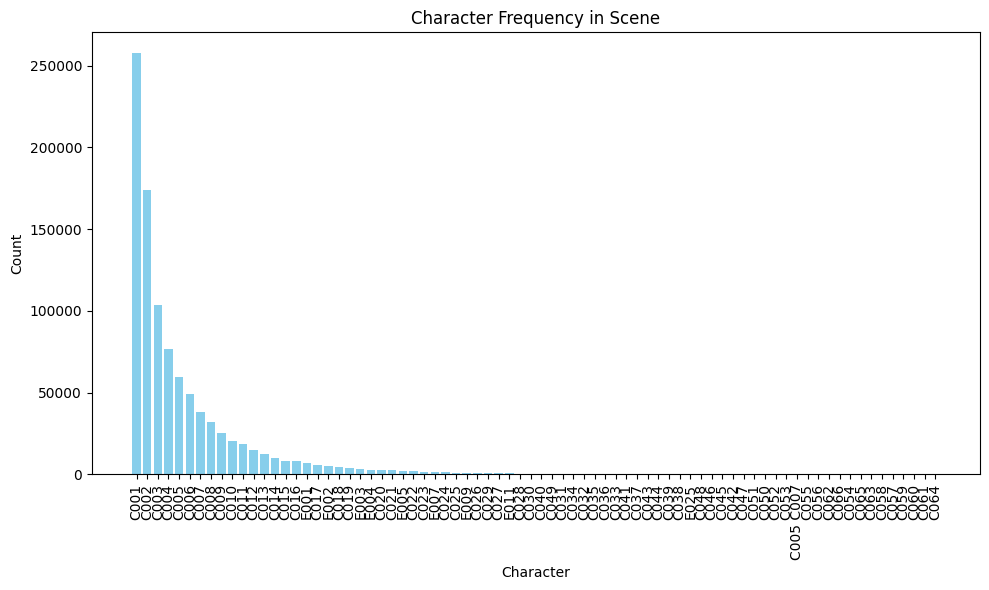

In [61]:
# 데이터프레임을 등장 횟수로 내림차순 정렬
character_df = character_df.sort_values(by='Count', ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(character_df['Character'], character_df['Count'], color='skyblue')
plt.xlabel('Character')
plt.ylabel('Count')
plt.title('Character Frequency in Scene')
plt.xticks(rotation=90)  # X축 레이블 회전
plt.tight_layout()
plt.show()

대사별로 등장인물 몇번 등장했나?

In [62]:
character_df

,Character,Count
4,C001,257538
0,C002,173748
1,C003,103750
11,C004,76919
6,C005,59660
...,...,...
68,C057,1
70,C059,1
71,C060,1
72,C061,1


In [64]:
# characters_parsed 열에 등장하는 고유한 등장인물 수를 소설 id별로 계산
df['unique_characters'] = df.groupby('id')['characters_parsed'].transform(lambda x: len(set([char for sublist in x for char in sublist])))

# 소설별 등장인물 수 계산
novel_character_counts = df.groupby('id')['unique_characters'].max()

# 결과 출력
ncc = pd.DataFrame(novel_character_counts)

In [65]:
ncc

,unique_characters
id,
01_0017,10
01_0018,17
01_0019,11
01_0020,13
01_0021,9
...,...
04_3900,13
04_3903,13
04_3904,10


In [66]:
ncc.reset_index(inplace=True)
ncc

,id,unique_characters
0,01_0017,10
1,01_0018,17
2,01_0019,11
3,01_0020,13
4,01_0021,9
...,...,...
3093,04_3900,13
3094,04_3903,13
3095,04_3904,10
3096,04_3905,11


In [70]:
abc = pd.DataFrame(ncc['unique_characters'].value_counts())
abc.reset_index(inplace=True)
abc

,unique_characters,count
0,10,205
1,8,204
2,9,202
3,7,197
4,11,187
5,13,187
6,12,173
7,6,155
8,14,151
9,15,147


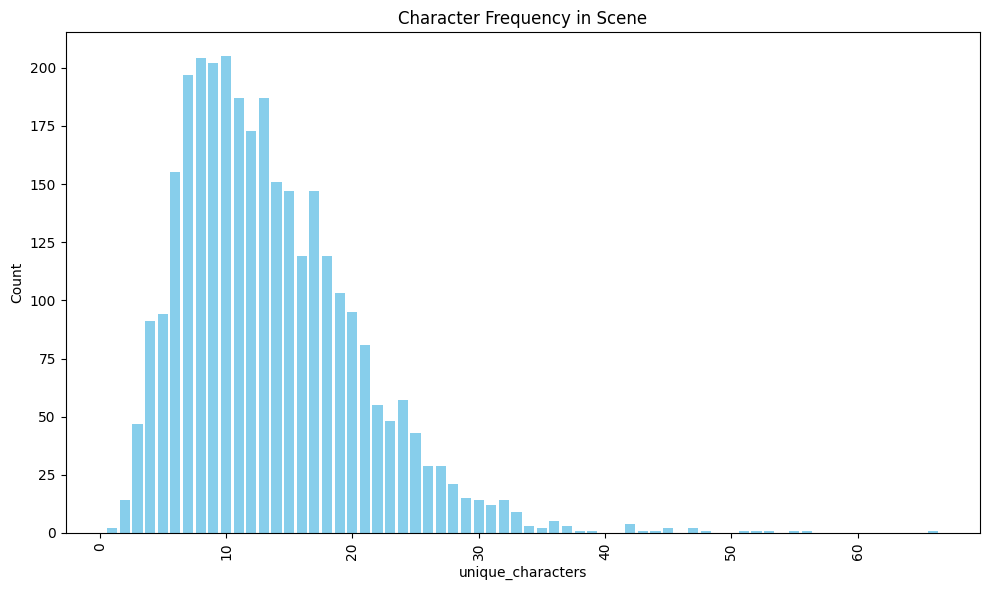

In [72]:
# 데이터프레임을 등장 횟수로 내림차순 정렬
abc = abc.sort_values(by='count', ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(abc['unique_characters'], abc['count'], color='skyblue')
plt.xlabel('unique_characters')
plt.ylabel('Count')
plt.title('Character Frequency in Scene')
plt.xticks(rotation=90)  # X축 레이블 회전
plt.tight_layout()
plt.show()

소설별로 등장인물 몇 명인가? 한글 캐릭터도 포함해서

In [73]:
abc['count'].sum()

3098

In [74]:
df

,id,characters,genre,motif,unit_motif,unit_stage,scene_char,scene_type,scene_emotion,scene_content,characters_parsed,scene_char1,unique_characters
0,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],narrative,단호하다,C002이 발표한다.,"[C001, C002, C003, C004, C005, C006, C007, C00...",[C002],12
1,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,C001은 역모를 꾸미지 않았다. 그러니 C001은 더 이상 감옥에 갇혀있지 않을 ...,"[C001, C002, C003, C004, C005, C006, C007, C00...",[C002],12
2,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],narrative,초조하다,중신1이 소리친다.,"[C001, C002, C003, C004, C005, C006, C007, C00...",[중신1],12
3,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['중신1'],script,초조하다,말도 안 됩니다! C001은 전하를 헤치려고 한 자입니다.,"[C001, C002, C003, C004, C005, C006, C007, C00...",[중신1],12
4,02_2987,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...","['판타지', '드라마']",납치,공적인 입장표명,Opening Salvo,['C002'],script,단호하다,증거가 있는가?,"[C001, C002, C003, C004, C005, C006, C007, C00...",[C002],12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879658,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,화나다,미쳤어?,"[C001, C002, C003, C004, C005, C006, C007, C00...",[C001],24
879659,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],narrative,단호하다,C001이 C002에게 오늘 이후로 만나지 않을 거라고 말한다.,"[C001, C002, C003, C004, C005, C006, C007, C00...",[C001],24
879660,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C002'],narrative,씁쓸하다,C002이 C001에게 이제 너 없이도 잘 잔다고 말한다.,"[C001, C002, C003, C004, C005, C006, C007, C00...",[C002],24
879661,01_0656,"['C001', 'C002', 'C003', 'C004', 'C005', 'C006...",['멜로/로맨스'],첫눈에 반한 사랑,재결합,Final Salvo,['C001'],script,괘씸하다,잘 됐다.,"[C001, C002, C003, C004, C005, C006, C007, C00...",[C001],24


In [77]:
import pandas as pd
from collections import Counter

# 등장인물이 등장한 소설 수를 계산할 Counter 객체 생성
character_novel_counts = Counter()

# 각 소설 ID별로 등장인물 카운트
for novel_id, group in df.groupby('id'):
    # 각 소설의 등장인물 리스트를 중복 제거하여 하나의 세트로 결합
    unique_characters = set([char for characters in group['characters_parsed'] for char in characters])

    # 각 등장인물이 소설에 등장한 횟수 카운트
    for char in unique_characters:
        character_novel_counts[char] += 1

# 등장인물과 등장한 소설 수를 데이터프레임으로 변환
character_novel_df = pd.DataFrame(character_novel_counts.items(), columns=['Character', 'Novel Count'])

# 결과 출력
character_novel_df

,Character,Novel Count
0,C003,3051
1,C002,3082
2,C009,2238
3,C010,2060
4,C008,2422
...,...,...
252,1,28
253,7,10
254,8,10
255,핀,11


In [79]:
print(character_novel_df)

    Character  Novel Count
0        C003         3051
1        C002         3082
2        C009         2238
3        C010         2060
4        C008         2422
..        ...          ...
252         1           28
253         7           10
254         8           10
255         핀           11
256         린            3

[257 rows x 2 columns]


In [86]:
character_novel_df = character_novel_df.sort_values(by='Novel Count', ascending=False)

In [87]:
character_novel_df.to_excel('character_novel_df.xlsx')

등장인물별로 전체소설에서 몇개의 소설에 나왔나?